Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain, LinearAlgebra
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


Use data from m4.1s

Check if the m4.1s.jls file is present. If not, run the model.

In [5]:
!isfile(joinpath(ProjDir, "m4.1s.jls")) && include(joinpath(ProjDir, "m4.1s.jl"))

chn = deserialize(joinpath(ProjDir, "m4.1s.jls"))

Object of type "Chains{Float64}"

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Union{Missing, Float64}[7.36607 154.552; 7.92793 154.672; … ; 8.00457 154.473; 7.43351 154.732]

Union{Missing, Float64}[8.02428 154.178; 7.64058 154.528; … ; 7.63329 154.723; 8.13893 154.338]

Union{Missing, Float64}[7.42532 154.335; 7.49863 154.477; … ; 7.68715 153.861; 7.64571 153.607]

Union{Missing, Float64}[8.25196 154.057; 8.21083 154.284; … ; 7.99526 154.779; 7.8142 154.201]

Describe the draws

In [6]:
describe(chn)

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
         Mean        SD       Naive SE       MCSE      ESS
sigma   7.770557 0.28748416 0.0045455237 0.0050004111 1000
   mu 154.613013 0.41968195 0.0066357543 0.0074375128 1000

Quantiles:
          2.5%       25.0%       50.0%      75.0%      97.5%  
sigma   7.2371605   7.5735775   7.758565   7.956745   8.367241
   mu 153.7909500 154.3270000 154.618500 154.890000 155.443025



Plot the density of posterior draws

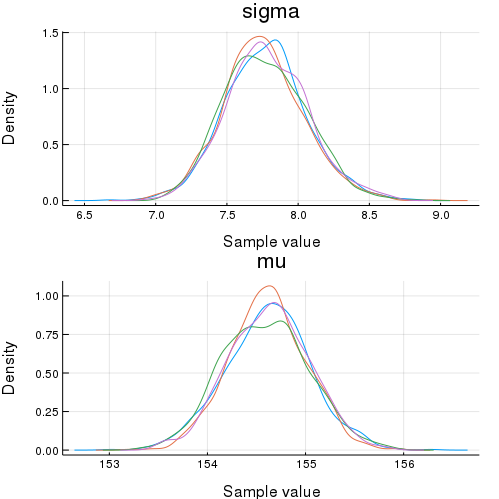

In [7]:
density(chn, lab="All heights", xlab="height [cm]", ylab="density")

Compute cor

In [8]:
mu_sigma = hcat(chn.value[:, 2, 1], chn.value[:,1, 1])
LinearAlgebra.diag(cov(mu_sigma))

2-element Array{Float64,1}:
 0.1885019997587585 
 0.08470790002372411

Compute cov

In [9]:
cor(mu_sigma)

2×2 Array{Float64,2}:
 1.0       0.059046
 0.059046  1.0     

End of `clip_07.0s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*